In [2]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [4]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [5]:
features[0], labels[0]

(
 [ 1.4642214 -1.3058136]
 <NDArray 2 @cpu(0)>, 
 [11.562276]
 <NDArray 1 @cpu(0)>)

In [6]:
features[0:5]


[[ 1.4642214  -1.3058136 ]
 [ 0.9344402   0.5380863 ]
 [-0.16038011  0.84187603]
 [-1.0055363   3.132215  ]
 [-0.4358989  -0.49295077]]
<NDArray 5x2 @cpu(0)>

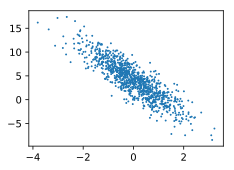

In [16]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1); # 加分号表示只显示图

In [20]:
# 读取数据集

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j) # take 函数根据索引返回对应元素

        
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.1389543   0.6671155 ]
 [ 0.2207303  -1.4459176 ]
 [-0.602328    0.5539335 ]
 [ 0.03209951  0.75055873]
 [ 1.4457564  -1.8740788 ]
 [-0.06433223 -0.06503782]
 [-0.47412786 -3.8091726 ]
 [ 1.2637488   0.9863251 ]
 [-1.3419094  -1.0139565 ]
 [ 0.605965    1.992107  ]]
<NDArray 10x2 @cpu(0)> 
[ 2.212      9.553793   1.1184014  1.6850444 13.470849   4.2903094
 16.19929    3.404824   4.9591947 -1.3447869]
<NDArray 10 @cpu(0)>


In [21]:
# 初始化模型参数
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

# 创建梯度
w.attach_grad() # Attach a gradient buffer to this NDArray
b.attach_grad()

In [23]:
# 定义模型
def linreg(X, w, b):
    return nd.dot(X, w) + b


# 定义损失函数
def squared_loss(y_hat, y):
    return(y_hat - y.reshape(y_hat.shape)) ** 2 / 2


# 定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [30]:
# 训练模型
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # l是小批量X， y的损失
        l.backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型参数
    
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000049
epoch 2, loss 0.000049
epoch 3, loss 0.000049


In [35]:
w, b

(
 [[ 2.0001097]
  [-3.4001522]]
 <NDArray 2x1 @cpu(0)>, 
 [4.199735]
 <NDArray 1 @cpu(0)>)